# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [18]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
from IPython.html.widgets import interact

img_path = 'data/lena.png'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

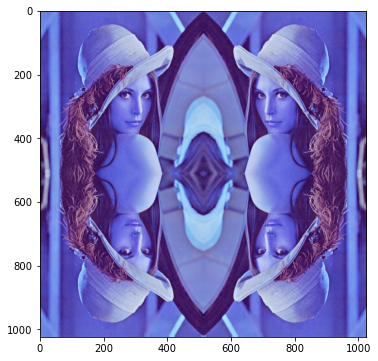

In [14]:
# 水平翻轉 (horizontal)
img_hflip = img[:,::-1,:]

# 垂直翻轉 (vertical)
img_vflip = img[::-1,:,:]

# 水平 + 垂直翻轉
img_hvflip = img[::-1,::-1,:]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))
#while True:
#    cv2.imshow('flip image', img_flip)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
plt.figure(figsize=(6,6))
plt.imshow(img_flip)

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.0019292831420898438
INTER_CUBIC zoom cost 0.0


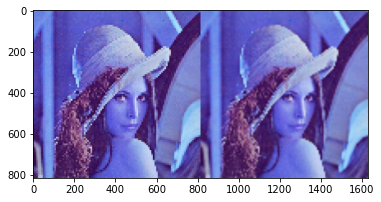

In [17]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None , fx=fx, fy=fy ,interpolation= cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize( img_test, None, fx = fx ,fy = fy ,interpolation = cv2.INTER_LINEAR)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
img_zoom = np.hstack((img_area_scale, img_cubic_scale))
#while True:
#    cv2.imshow('zoom image', img_zoom)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

plt.figure(figsize=(6,6))
plt.imshow(img_zoom)

## 平移幾何轉換

In [19]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
def my_warpAffine(x,y):
    M = np.array([[1,0,x],[0,1,y]],dtype = np.float32)
    shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    # 組合 + 顯示圖片
    img_shift = np.hstack((img, shift_img))
    #while True:
    #    cv2.imshow('shift image', img_shift)
    #    k = cv2.waitKey(0)
    #    if k == 27:
    #        cv2.destroyAllWindows()
    #        break

    plt.figure(figsize=(6,6))
    plt.imshow(img_shift)

In [20]:
interact(my_warpAffine ,x=(0,500),y=(0,500))

interactive(children=(IntSlider(value=250, description='x', max=500), IntSlider(value=250, description='y', ma…

<function __main__.my_warpAffine(x, y)>